In [1]:
# Imports! We love our imports!
import uproot
import awkward as ak
import hist

import warnings
import matplotlib as mpl
import ipympl
import matplotlib.pyplot as plt
import mplhep
from numpy.polynomial.polynomial import polyfit
from scipy.optimize import curve_fit
from scipy.optimize import OptimizeWarning
import numpy as np
%matplotlib inline
#%matplotlib ipympl
mpl.style.use(mplhep.style.ROOT)

In [2]:
# NEEDS TO BE RUN BEFORE ANY BELOW

with uproot.open('photoneutron_8GeV_06May.root') as f:
    events=f['photoNeutrons'].arrays()

#events
events[events.EcalVeto_discValue>0.2]


<Array [{electronE: 8e+03, ...}, ..., {...}] type='10799 * {electronE: floa...'>

In [22]:
# NEEDS TO BE RUN BEFORE ANY BELOW

width=10
height=16
pointSize=3
axisTitleSize=12
tickSize=10
filter=events.EcalVeto_discValue>0.2
EkinRatio=events.neutronE/events.gammaE
eventsF=events[filter]
EkinRatioF=EkinRatio[filter]
full=True
filtered=True
fullColor='darkblue'
filteredColor='orange'
alphaFull=1
alphaFiltered=1;


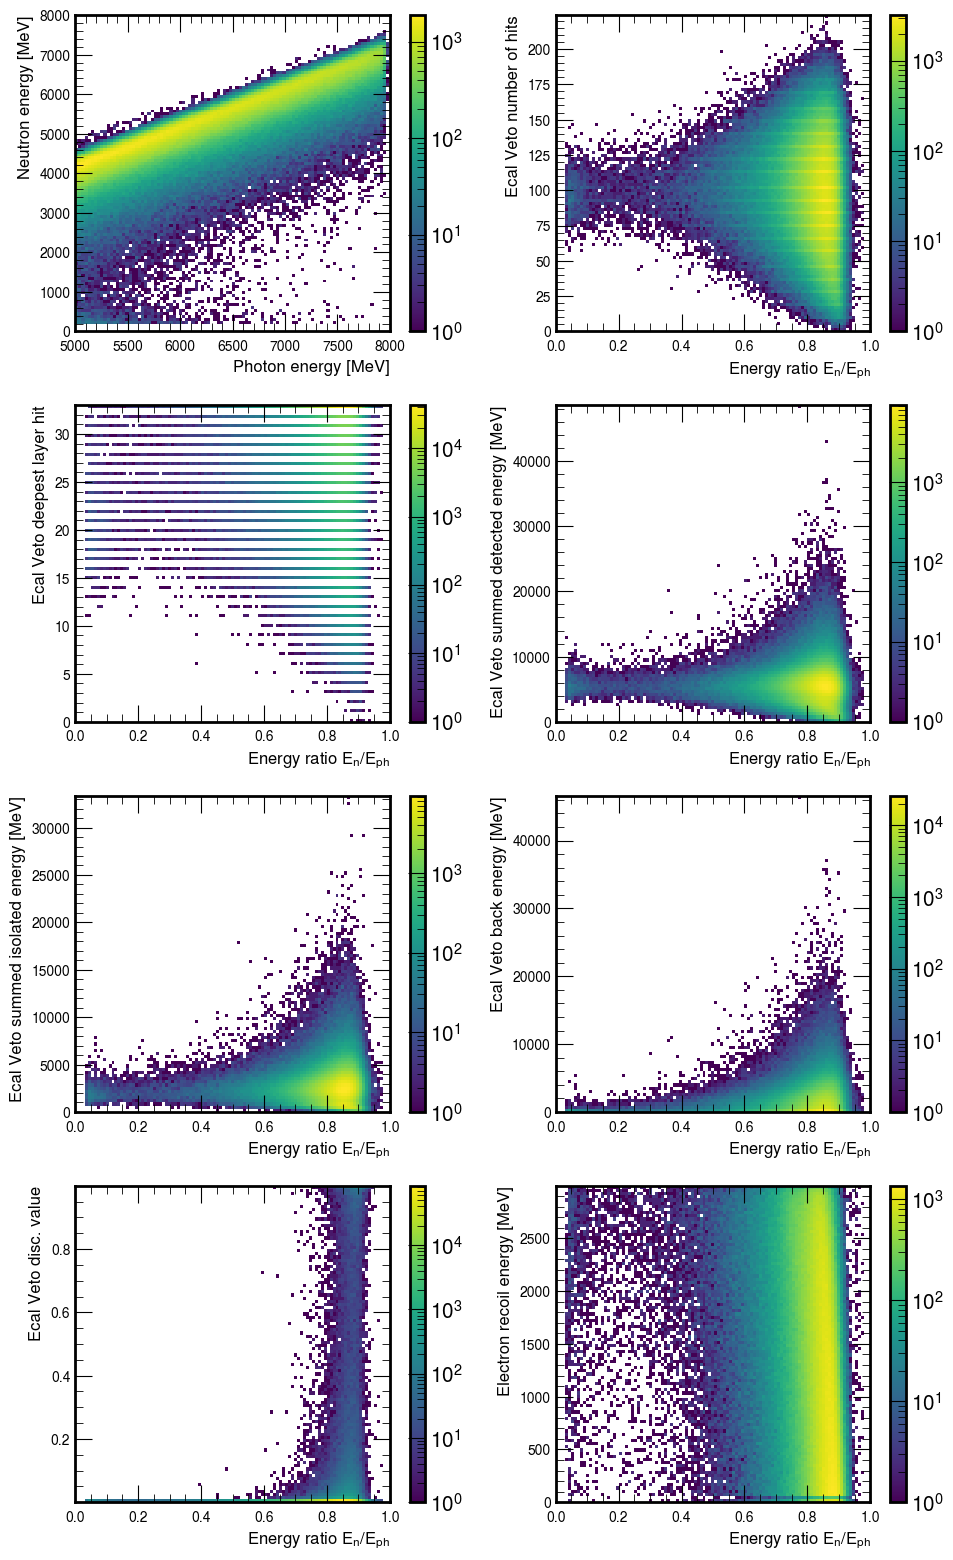

In [27]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8))=plt.subplots(4,2)
fig.set_figwidth(width)
fig.set_figheight(height)
fig.tight_layout()

N2Ph=ax1.hist2d(np.asarray(events.gammaE), np.asarray(events.neutronE), bins=100, 
                norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(N2Ph[3])
ax1.set_xlim([5000,8000])
ax1.set_ylim([0,8000])
ax1.set_xlabel("Photon energy [MeV]", fontsize=axisTitleSize)
ax1.set_ylabel("Neutron energy [MeV]", fontsize=axisTitleSize)
ax1.tick_params(axis="both", which="major", labelsize=tickSize)

NRH=ax2.hist2d(np.asarray(EkinRatio), np.asarray(events.EcalVeto_nReadoutHits), bins=100, 
               norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(NRH[3])
ax2.set_xlim([0,1])
ax2.set_xlabel("Energy ratio $E_n/E_{ph}$", fontsize=axisTitleSize)
ax2.set_ylabel("Ecal Veto number of hits", fontsize=axisTitleSize)
ax2.tick_params(axis="both", which="major", labelsize=tickSize)

DLH=ax3.hist2d(np.asarray(EkinRatio), np.asarray(events.EcalVeto_deepestLayerHit), bins=100, 
               norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(DLH[3])
ax3.set_xlim([0,1])
ax3.set_xlabel("Energy ratio $E_n/E_{ph}$", fontsize=axisTitleSize)
ax3.set_ylabel("Ecal Veto deepest layer hit", fontsize=axisTitleSize)
ax3.tick_params(axis="both", which="major", labelsize=tickSize)

SD=ax4.hist2d(np.asarray(EkinRatio), np.asarray(events.EcalVeto_summedDet), bins=100, 
              norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(SD[3])
ax4.set_xlim([0,1])
ax4.set_xlabel("Energy ratio $E_n/E_{ph}$", fontsize=axisTitleSize)
ax4.set_ylabel("Ecal Veto summed detected energy [MeV]", fontsize=axisTitleSize)
ax4.tick_params(axis="both", which="major", labelsize=tickSize)

STI=ax5.hist2d(np.asarray(EkinRatio), np.asarray(events.EcalVeto_summedTightIso), bins=100, 
               norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(STI[3])
ax5.set_xlim([0,1])
ax5.set_xlabel("Energy ratio $E_n/E_{ph}$", fontsize=axisTitleSize)
ax5.set_ylabel("Ecal Veto summed isolated energy [MeV]", fontsize=axisTitleSize)
ax5.tick_params(axis="both", which="major", labelsize=tickSize)

EBE=ax6.hist2d(np.asarray(EkinRatio), np.asarray(events.EcalVeto_ecalBackEnergy), bins=100, 
               norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(EBE[3])
ax6.set_xlim([0,1])
ax6.set_xlabel("Energy ratio $E_n/E_{ph}$", fontsize=axisTitleSize)
ax6.set_ylabel("Ecal Veto back energy [MeV]", fontsize=axisTitleSize)
ax6.tick_params(axis="both", which="major", labelsize=tickSize)

DV=ax7.hist2d(np.asarray(EkinRatio), np.asarray(events.EcalVeto_discValue), bins=100, 
              norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(DV[3])
ax7.set_xlim([0,1])
ax7.set_xlabel("Energy ratio $E_n/E_{ph}$", fontsize=axisTitleSize)
ax7.set_ylabel("Ecal Veto disc. value", fontsize=axisTitleSize)
ax7.tick_params(axis="both", which="major", labelsize=tickSize)

RE=ax8.hist2d(np.asarray(EkinRatio), np.asarray(events.recoilE), bins=100, 
              norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(RE[3])
ax8.set_xlim([0,1])
ax8.set_xlabel("Energy ratio $E_n/E_{ph}$", fontsize=axisTitleSize)
ax8.set_ylabel("Electron recoil energy [MeV]", fontsize=axisTitleSize)
ax8.tick_params(axis="both", which="major", labelsize=tickSize)


plt.show()


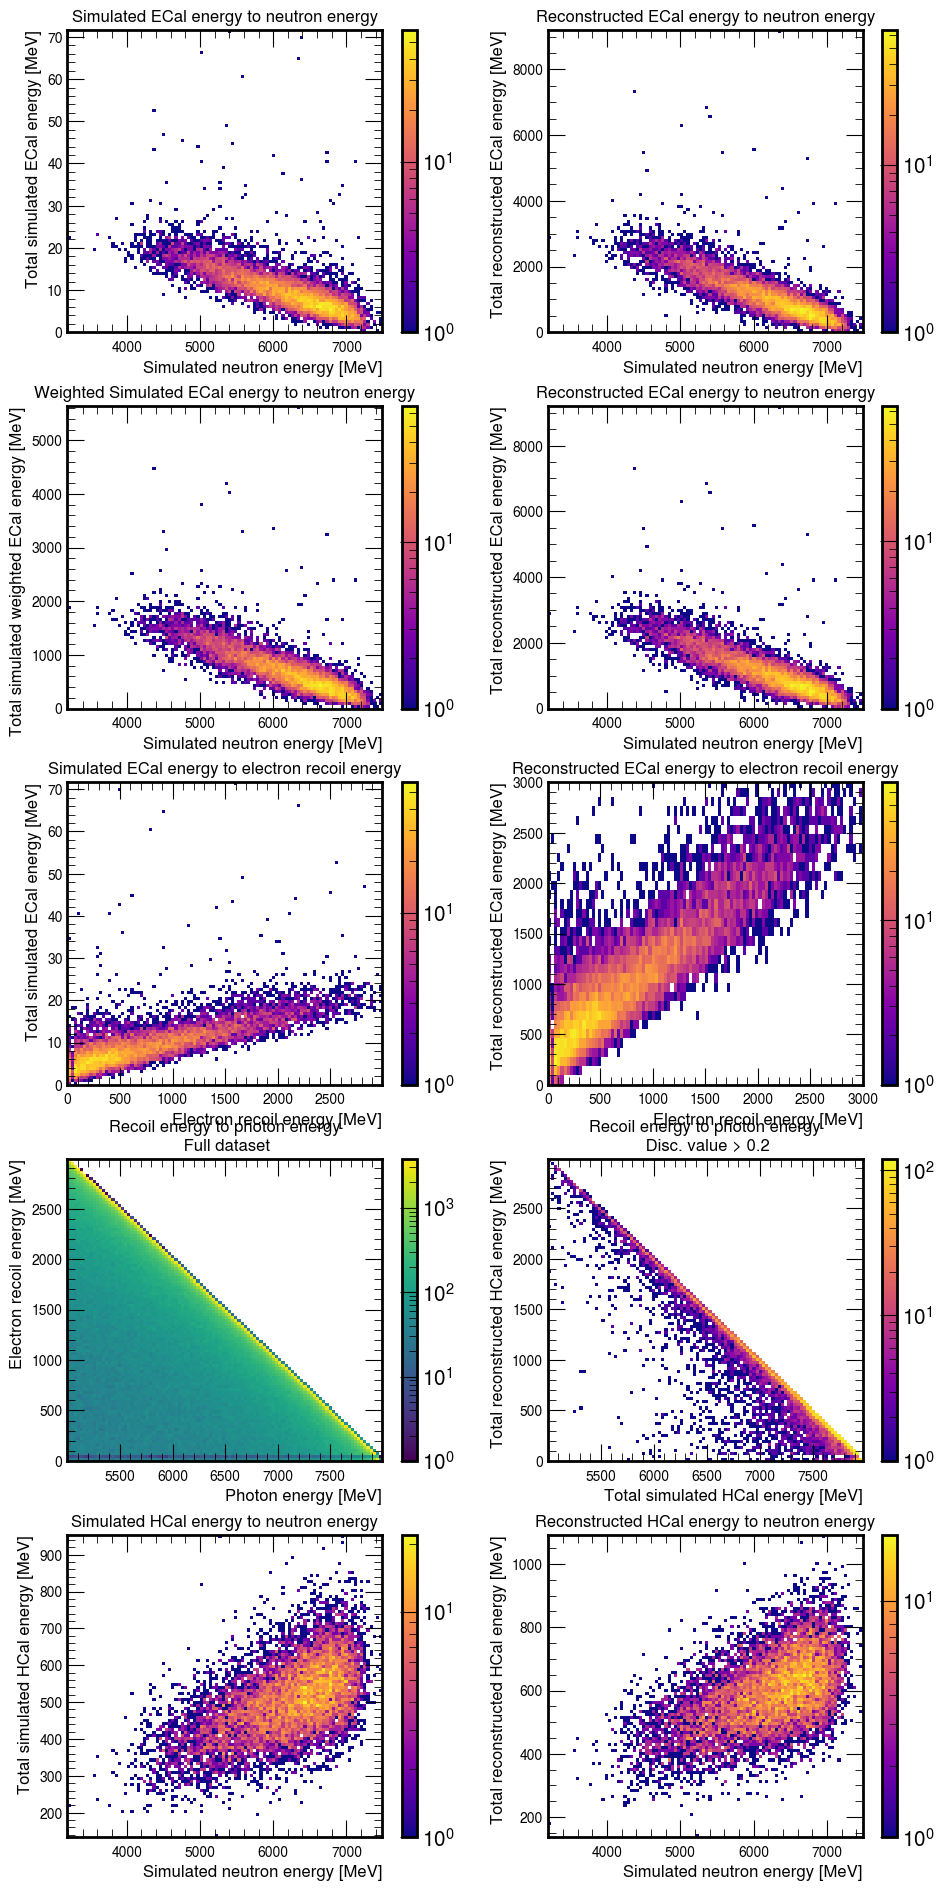

In [28]:
Recs, ((rec1, rec2), (rec3, rec4), (rec5, rec6), (rec7, rec8), (rec9, rec10))=plt.subplots(5,2)
Recs.set_figwidth(width)
Recs.set_figheight(1.2*height)
Recs.tight_layout()


ESim2N=rec1.hist2d(np.asarray(eventsF.neutronE), np.asarray(eventsF.EcalSimTotE), bins=100, 
                   norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(ESim2N[3])
rec1.set_title("Simulated ECal energy to neutron energy", fontsize=axisTitleSize)
rec1.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
rec1.set_ylabel("Total simulated ECal energy [MeV]", fontsize=axisTitleSize) 
rec1.tick_params(axis="both", which="major", labelsize=tickSize)


ERec2N=rec2.hist2d(np.asarray(eventsF.neutronE), np.asarray(eventsF.EcalRecTotE), bins=100, 
                   norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(ERec2N[3])
rec2.set_title("Reconstructed ECal energy to neutron energy", fontsize=axisTitleSize)
rec2.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
rec2.set_ylabel("Total reconstructed ECal energy [MeV]", fontsize=axisTitleSize)
rec2.tick_params(axis="both", which="major", labelsize=tickSize)


ESimWeight2N=rec3.hist2d(np.asarray(eventsF.neutronE), np.asarray(eventsF.EcalSimWeightE), bins=100, 
                         norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(ESimWeight2N[3])
rec3.set_title("Weighted Simulated ECal energy to neutron energy", fontsize=axisTitleSize)
rec3.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
rec3.set_ylabel("Total simulated weighted ECal energy [MeV]", fontsize=axisTitleSize) 
rec3.tick_params(axis="both", which="major", labelsize=tickSize)


ERec2N=rec4.hist2d(np.asarray(eventsF.neutronE), np.asarray(eventsF.EcalRecTotE), bins=100, 
                   norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(ERec2N[3])
rec4.set_title("Reconstructed ECal energy to neutron energy", fontsize=axisTitleSize)
rec4.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
rec4.set_ylabel("Total reconstructed ECal energy [MeV]", fontsize=axisTitleSize) #Calibrate?
rec4.tick_params(axis="both", which="major", labelsize=tickSize)


Sim2Recoil=rec5.hist2d(np.asarray(eventsF.recoilE), np.asarray(eventsF.EcalSimTotE), bins=100, 
                       norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(Sim2Recoil[3])
rec5.set_title("Simulated ECal energy to electron recoil energy", fontsize=axisTitleSize)
rec5.set_xlabel("Electron recoil energy [MeV]", fontsize=axisTitleSize)
rec5.set_ylabel("Total simulated ECal energy [MeV]", fontsize=axisTitleSize)
rec5.tick_params(axis="both", which="major", labelsize=tickSize)


Recon2Recoil=rec6.hist2d(np.asarray(eventsF.recoilE), np.asarray(eventsF.EcalRecTotE), bins=100, 
                         norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(Recon2Recoil[3])
rec6.set_title("Reconstructed ECal energy to electron recoil energy", fontsize=axisTitleSize)
rec6.set_xlim(0,3000)
rec6.set_ylim(0,3000)
rec6.set_xlabel("Electron recoil energy [MeV]", fontsize=axisTitleSize)
rec6.set_ylabel("Total reconstructed ECal energy [MeV]", fontsize=axisTitleSize)
rec6.tick_params(axis="both", which="major", labelsize=tickSize)


recoil2gammaE=rec7.hist2d(np.asarray(events.gammaE), np.asarray(events.recoilE), bins=100, 
                          norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
Recs.colorbar(recoil2gammaE[3])
rec7.set_title("Recoil energy to photon energy\n Full dataset", fontsize=axisTitleSize)
rec7.set_xlabel("Photon energy [MeV]", fontsize=axisTitleSize)
rec7.set_ylabel("Electron recoil energy [MeV]", fontsize=axisTitleSize)
rec7.tick_params(axis="both", which="major", labelsize=tickSize)


recoil2gammaEF=rec8.hist2d(np.asarray(eventsF.gammaE), np.asarray(eventsF.recoilE), bins=100, 
                           norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(recoil2gammaEF[3])
rec8.set_title("Recoil energy to photon energy\n Disc. value > 0.2", fontsize=axisTitleSize)
rec8.set_xlabel("Total simulated HCal energy [MeV]", fontsize=axisTitleSize)
rec8.set_ylabel("Total reconstructed HCal energy [MeV]", fontsize=axisTitleSize)
rec8.tick_params(axis="both", which="major", labelsize=tickSize)


HSim2N=rec9.hist2d(np.asarray(eventsF.neutronE), np.asarray(eventsF.HcalSimTotE), bins=100, 
                   norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(HSim2N[3])
rec9.set_title("Simulated HCal energy to neutron energy", fontsize=axisTitleSize)
rec9.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
rec9.set_ylabel("Total simulated HCal energy [MeV]", fontsize=axisTitleSize)
rec9.tick_params(axis="both", which="major", labelsize=tickSize)


HRec2N=rec10.hist2d(np.asarray(eventsF.neutronE), np.asarray(eventsF.HcalRecTotE), bins=100, 
                    norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
Recs.colorbar(HRec2N[3])
rec10.set_title("Reconstructed HCal energy to neutron energy", fontsize=axisTitleSize)
rec10.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
rec10.set_ylabel("Total reconstructed HCal energy [MeV]", fontsize=axisTitleSize)
rec10.tick_params(axis="both", which="major", labelsize=tickSize)

plt.show()

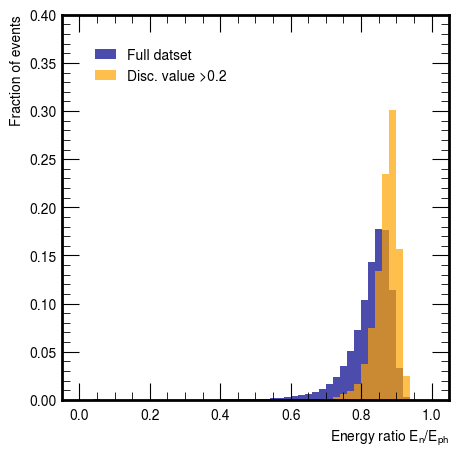

0.8238345 0.07393344378391989
0.8722280238621631 0.03387546833027129


In [44]:
plt.figure(figsize=(5,5))
binNR=50
if(full): 
    heightsFull, binsFull, patchesFull=plt.hist(EkinRatio, bins=binNR, range=[0,1], color=fullColor, 
                                                alpha=0.7, label="Full datset")
    for patch in patchesFull:
        patch.set_height(patch.get_height()/ak.sum(heightsFull))
if(filtered): 
    heightsFiltered, binsFiltered, patchesFiltered=plt.hist(EkinRatioF, bins=binNR, range=[0,1], 
                                                color=filteredColor, alpha=0.7, label="Disc. value >0.2")
    for patch in patchesFiltered:
        patch.set_height(patch.get_height()/ak.sum(heightsFiltered))
plt.ylim((0,20/binNR))
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=10)
plt.xlabel("Energy ratio $E_n/E_{ph}$", fontsize=10)
plt.ylabel("Fraction of events", fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()
print(str(ak.mean(EkinRatio))+" "+str(ak.std(EkinRatio)))
print(str(ak.mean(EkinRatioF))+" "+str(ak.std(EkinRatioF)))

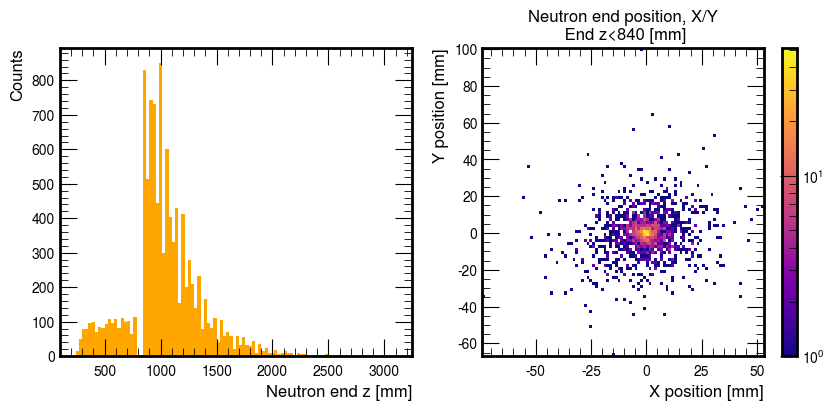

In [31]:

fig, (ax1, ax2)=plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(4)

(counts, edges, patches)=ax1.hist(eventsF.neutronEndZ, bins=100, color='orange')
ax1.set_xlabel("Neutron end z [mm]", fontsize=axisTitleSize)
ax1.set_ylabel("Counts", fontsize=axisTitleSize)

neutronEndXY=ax2.hist2d(np.asarray(eventsF[eventsF.neutronEndZ<840].neutronEndX), 
                        np.asarray(eventsF[eventsF.neutronEndZ<840].neutronEndY), bins=100, 
                        norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
fig.colorbar(neutronEndXY[3])
ax2.set_title("Neutron end position, X/Y\n End z<840 [mm]", fontsize=axisTitleSize)
ax2.set_xlabel("X position [mm]", fontsize=axisTitleSize)
ax2.set_ylabel("Y position [mm]", fontsize=axisTitleSize)
plt.show()


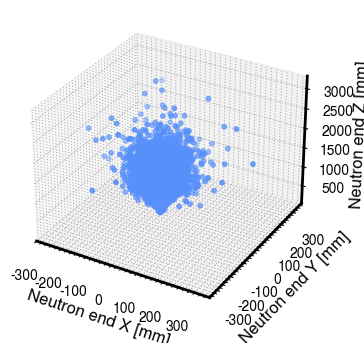

In [32]:
#plt.close('all')
fig3D=plt.figure()
fig3D.set_figwidth(6)
fig3D.set_figheight(4)
ax3D=fig3D.add_subplot(projection="3d")

ax3D.scatter(eventsF.neutronEndX, eventsF.neutronEndY, eventsF.neutronEndZ, s=10)
ax3D.set_xlabel("Neutron end X [mm]", fontsize=axisTitleSize)
ax3D.set_ylabel("Neutron end Y [mm]", fontsize=axisTitleSize)
ax3D.set_zlabel("Neutron end Z [mm]", fontsize=axisTitleSize)
ax3D.tick_params(axis="both", which="major", labelsize=10)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()

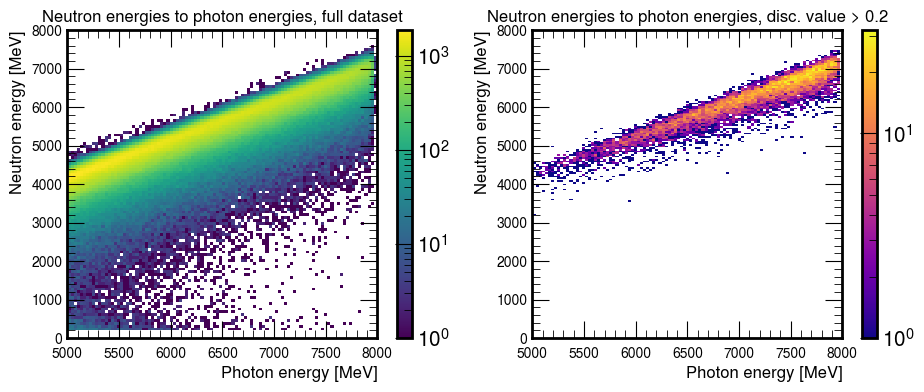

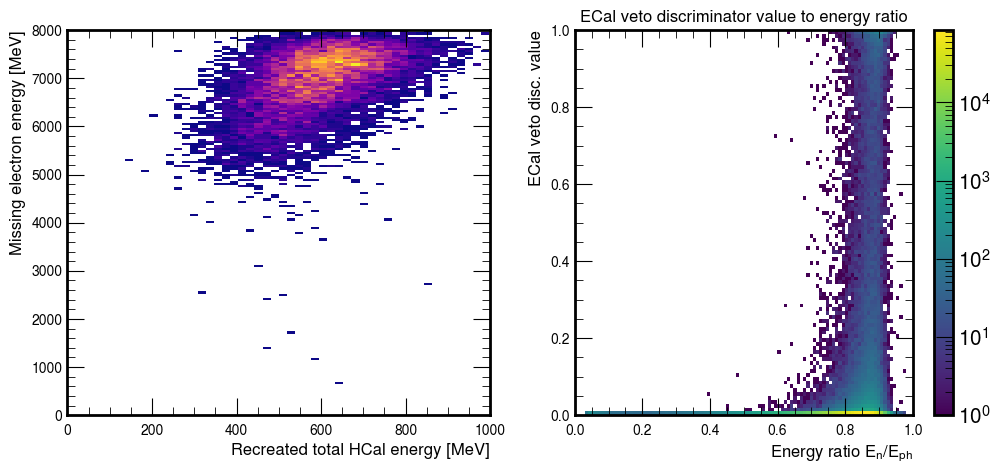

In [42]:
fig, (ax1, ax2)=plt.subplots(1,2)
fig.set_figwidth(11)
fig.set_figheight(4)

PN=ax1.hist2d(np.asarray(events.gammaE), np.asarray(events.neutronE), bins=100, 
              norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(PN[3])
ax1.set_xlim(5000,8000)
ax1.set_ylim(0,8000)
ax1.set_title("Neutron energies to photon energies, full dataset", fontsize=axisTitleSize)
ax1.set_xlabel("Photon energy [MeV]", fontsize=axisTitleSize)
ax1.set_ylabel("Neutron energy [MeV]", fontsize=axisTitleSize)
ax1.tick_params(axis="both", which="major", labelsize=tickSize)


PNdisc=ax2.hist2d(np.asarray(eventsF.gammaE), np.asarray(eventsF.neutronE), bins=100, 
                  norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
fig.colorbar(PNdisc[3])
ax2.set_xlim(5000,8000)
ax2.set_ylim(0,8000)
ax2.set_title("Neutron energies to photon energies, disc. value > 0.2", fontsize=axisTitleSize)
ax2.set_xlabel("Photon energy [MeV]", fontsize=axisTitleSize)
ax2.set_ylabel("Neutron energy [MeV]", fontsize=axisTitleSize)
ax2.tick_params(axis="both", which="major", labelsize=tickSize)

plt.show()

fig, (axis1, axis2)=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(5)
axis1.hist2d(np.asarray(eventsF[eventsF.HcalRecTotE>0].HcalRecTotE), 
             np.asarray(eventsF[eventsF.HcalRecTotE>0].electronE-eventsF[eventsF.HcalRecTotE>0].EcalRecTotE), 
             bins=(50, 200), cmin=1, cmap='plasma')
axis1.set_xlim(0,1000)
axis1.set_ylim(0, 8000)
axis1.set_xlabel("Recreated total HCal energy [MeV]", fontsize=axisTitleSize)
axis1.set_ylabel("Missing electron energy [MeV]", fontsize=axisTitleSize)
axis1.tick_params(axis="both", which="major", labelsize=tickSize)

hist2=axis2.hist2d(np.asarray(EkinRatio), np.asarray(events.EcalVeto_discValue), bins=(100, 100), 
                   norm=mpl.colors.LogNorm(vmin=1), cmap='viridis')
fig.colorbar(hist2[3])
axis2.set_xlim(0,1)
axis2.set_ylim(0,1)
axis2.set_title("ECal veto discriminator value to energy ratio", fontsize=axisTitleSize)
axis2.set_xlabel("Energy ratio $E_n/E_{ph}$", fontsize=axisTitleSize)
axis2.set_ylabel("ECal veto disc. value", fontsize=axisTitleSize)
axis2.tick_params(axis="both", which="major", labelsize=tickSize)


plt.show()

Mising electron energy = 544.2095625535752 + 0.888808364275985 * neutron energy


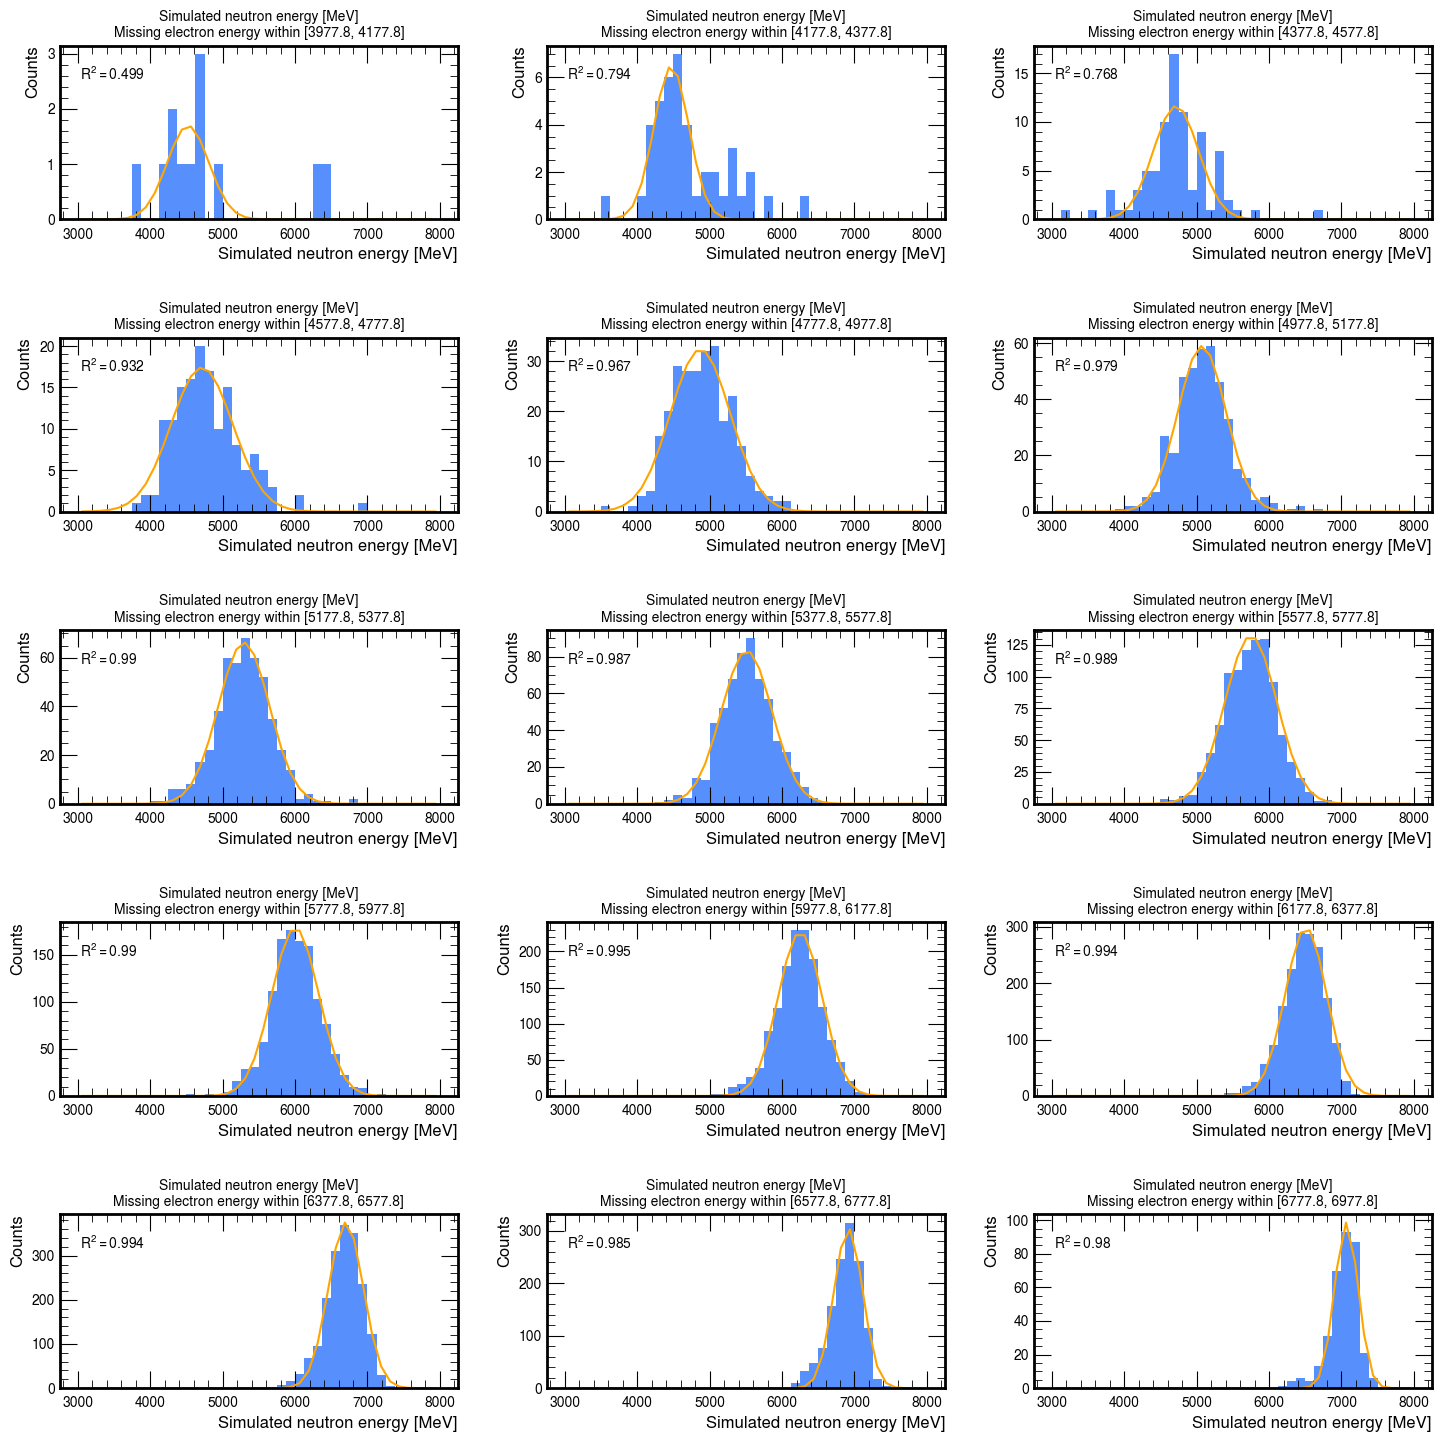

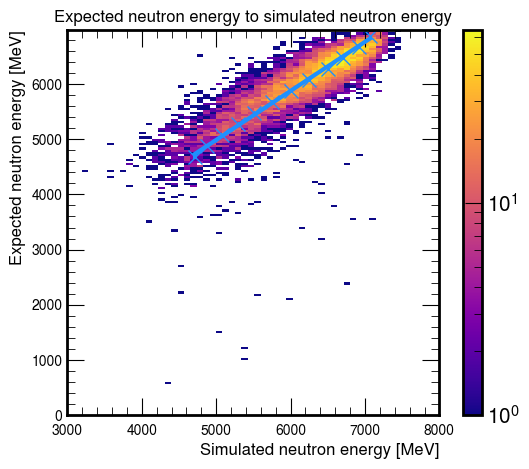

In [35]:
def gaussian(x, mu, sig, amp):
    return amp*np.exp(-(x-mu)**2/(2*sig**2))

rows=5
cols=3
etots=rows*cols
fig, ax=plt.subplots(rows,cols)
fig.set_figheight(rows*3)
fig.set_figwidth(cols*5)
plt.rcParams['figure.dpi']=100
a=ax.ravel()
nmeans=ak.ArrayBuilder()
missingE=ak.ArrayBuilder()
botE=5300*ak.mean(EkinRatioF)
topE=8000*ak.mean(EkinRatioF)

ECalErrs=ak.ArrayBuilder()
for idx, axis in enumerate(a):
    rangeE=3000
    lowerE=topE-rangeE+rangeE/etots*idx
    middleE=topE-rangeE+rangeE/etots*(idx+0.5)
    higherE=topE-rangeE+rangeE/etots*(idx+1)
    NeutronE=eventsF[(lowerE<((eventsF.electronE-eventsF.EcalRecTotE)*ak.mean(EkinRatioF))) & 
    (((eventsF.electronE-eventsF.EcalRecTotE)*ak.mean(EkinRatioF))<higherE)].neutronE
    (counts, binEdges, patches)=axis.hist(NeutronE, bins=40, range=[3000,8000])
    axis.tick_params(axis="both", which="major", labelsize=tickSize)
    axis.set_title("Simulated neutron energy [MeV]\n"+"Missing electron energy within ["+
                   str(round(lowerE, 1))+", "+str(round(higherE, 1))+"]", fontsize=10)
    axis.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
    axis.set_ylabel("Counts", fontsize=axisTitleSize)
    with warnings.catch_warnings():
        warnings.simplefilter("error", OptimizeWarning)
        try:
            bins=(binEdges+ (binEdges[1]-binEdges[0])*0.5*np.ones(len(binEdges)) )[:-1]
            params, covar=curve_fit(gaussian, bins, counts, p0=[np.mean(NeutronE), np.std(NeutronE), np.max(counts)])
            nmeans.append(params[0])
            missingE.append(middleE)
            axis.plot(bins, gaussian(bins, params[0], params[1], params[2]), color='orange')

            residuals=counts-gaussian(bins, *params)
            ss_res=np.sum(residuals**2)
            ss_tot=np.sum((counts-np.mean(counts))**2)
            r2=1-ss_res/ss_tot
            axis.text(0.05, 0.80, "$R^2=$"+str(round(r2,3)), fontsize=10, transform=axis.transAxes)

            ECalErrs.append(np.sqrt(covar[0][0]))
        except:
            continue
plt.tight_layout()
nmeans=ak.Array(nmeans)
missingE=ak.Array(missingE)
ECalErrs=ak.Array(ECalErrs)

missEOffset, missECoeff=polyfit(nmeans[missingE>botE], missingE[missingE>botE], 1)

fig2, ax2=plt.subplots(figsize=(6,5))
misse=ax2.hist2d(np.asarray(eventsF.neutronE), np.asarray((eventsF.electronE-eventsF.EcalRecTotE)*
                                ak.mean(EkinRatioF)), bins=(50, 200), norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
fig2.colorbar(misse[3])
ax2.set_xlim(3000, 8000)
ax2.set_ylim(0, topE)
ax2.errorbar(nmeans[missingE>botE], missingE[missingE>botE], xerr=ECalErrs[missingE>botE], 
             marker='x', markersize=10, linestyle='', color='dodgerblue', linewidth=3)
ax2.plot(nmeans[missingE>botE], missEOffset+missECoeff*nmeans[missingE>botE], color='dodgerblue', linewidth=3)
ax2.set_title("Expected neutron energy to simulated neutron energy", fontsize=axisTitleSize)
ax2.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
ax2.set_ylabel("Expected neutron energy [MeV]", fontsize=axisTitleSize)
ax2.tick_params(axis="both", which="major", labelsize=tickSize)

print("Mising electron energy = "+str(missEOffset) + " + " +str(missECoeff) + " * neutron energy")

HCal energy = 52.74604889040562 + 0.08636333051453714 * simulated neutron energy


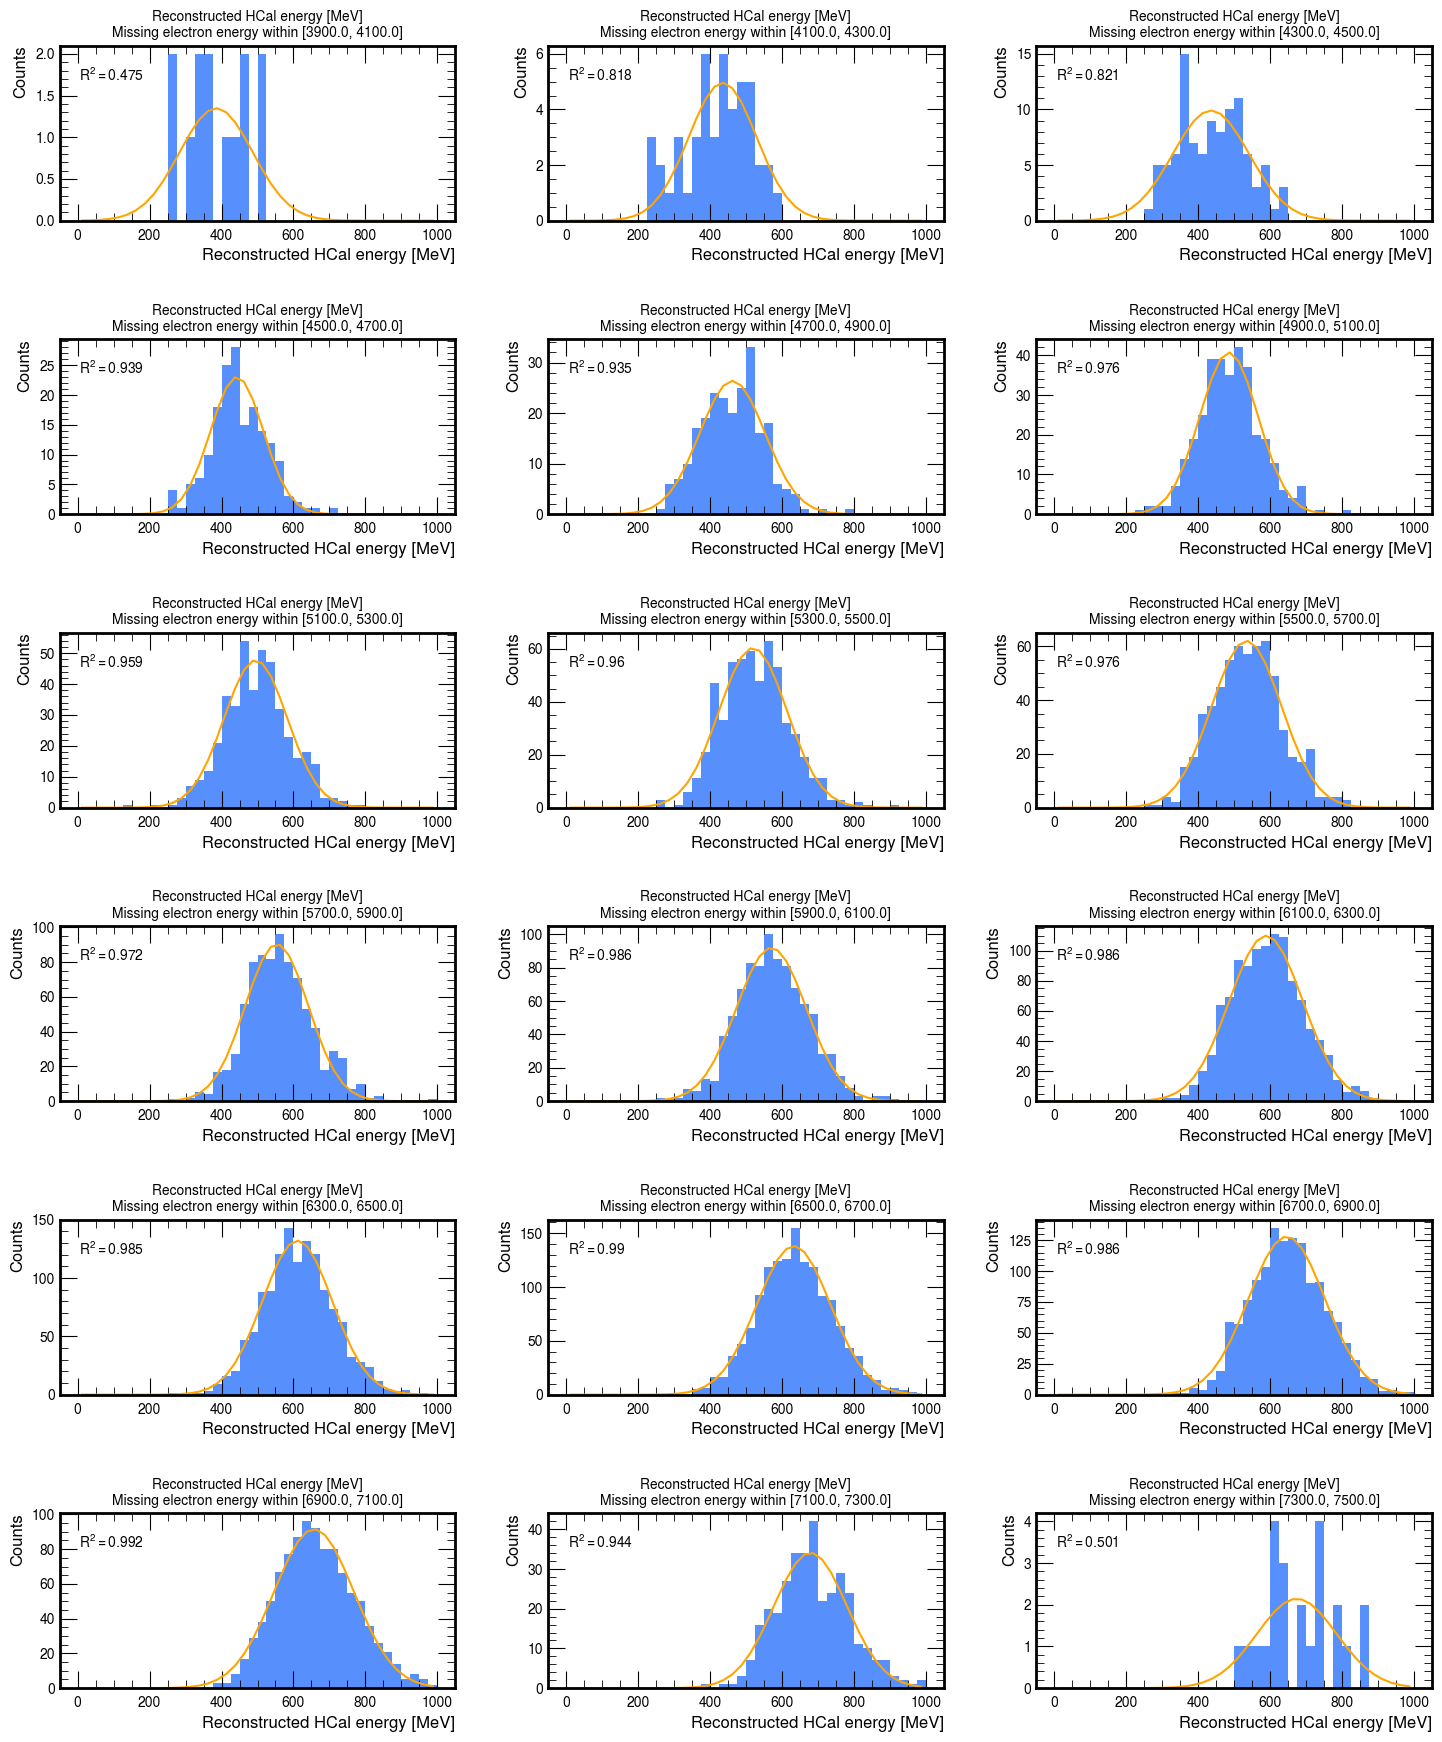

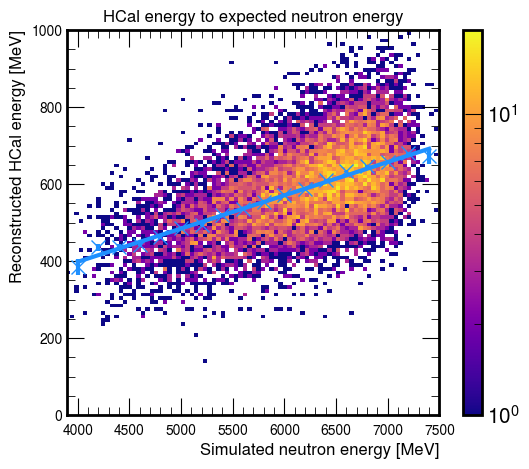

In [36]:
def gaussian(x, mu, sig, amp):
    return amp*np.exp(-(x-mu)**2/(2*sig**2))

rows=6
cols=3
htots=rows*cols
fig, ax=plt.subplots(rows,cols)
fig.set_figheight(rows*3)
fig.set_figwidth(cols*5)
a=ax.ravel()
hmeans=ak.ArrayBuilder()
hsigma=ak.ArrayBuilder()
hsigmaErrs=ak.ArrayBuilder()
hSMCovar=ak.ArrayBuilder()
simNE=ak.ArrayBuilder()
botE=3900
topE=7500
H2NErrs=ak.ArrayBuilder()
for idx, axis in enumerate(a):
    rangeE=3600
    lowerE=topE-rangeE+rangeE/htots*idx
    middleE=topE-rangeE+rangeE/htots*(idx+0.5)
    higherE=topE-rangeE+rangeE/htots*(idx+1)
    HRec=eventsF[(lowerE<eventsF.neutronE) & (eventsF.neutronE<higherE)].HcalRecTotE
    (counts, binEdges, patches)=axis.hist(HRec, bins=40, range=[0,1000])
    axis.tick_params(axis="both", which="major", labelsize=tickSize)
    axis.set_title("Reconstructed HCal energy [MeV]\n"+"Missing electron energy within ["+str(round(lowerE, 1))+
                   ", "+str(round(higherE, 1))+"]", fontsize=10)
    axis.set_xlabel("Reconstructed HCal energy [MeV]", fontsize=axisTitleSize)
    axis.set_ylabel("Counts", fontsize=axisTitleSize)
    with warnings.catch_warnings():
        warnings.simplefilter("error", OptimizeWarning)
        try:
            bins=(binEdges+ (binEdges[1]-binEdges[0])*0.5*np.ones(len(binEdges)) )[:-1]
            params, covar=curve_fit(gaussian, bins, counts, p0=[np.mean(HRec), np.std(HRec), np.max(counts)])
            hmeans.append(params[0])
            hsigma.append(params[1])
            hsigmaErrs.append(np.sqrt(covar[1][1]))
            hSMCovar.append(covar[0][1])
            simNE.append(middleE)
            axis.plot(bins, gaussian(bins, params[0], params[1], params[2]), color='orange')

            residuals=counts-gaussian(bins, *params)
            ss_res=np.sum(residuals**2)
            ss_tot=np.sum((counts-np.mean(counts))**2)
            r2=1-ss_res/ss_tot
            axis.text(0.05, 0.80, "$R^2=$"+str(round(r2,3)), fontsize=10, transform=axis.transAxes)

            H2NErrs.append(np.sqrt(covar[0][0]))
        except:
            continue
plt.tight_layout()
hmeans=ak.Array(hmeans)
hsigma=ak.Array(hsigma)
hsigmaErrs=ak.Array(hsigmaErrs)
hSMCovar=ak.Array(hSMCovar)
simNE=ak.Array(simNE)
H2NErrs=ak.Array(H2NErrs)

HRecOffset, HRecCoeff=polyfit(simNE[simNE>botE], hmeans[simNE>botE], 1)

fig2, ax2=plt.subplots(figsize=(6,5))
misse=ax2.hist2d(np.asarray(eventsF.neutronE), np.asarray(eventsF.HcalRecTotE), bins=100, 
                 norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
fig2.colorbar(misse[3])
ax2.set_xlim(botE, topE)
ax2.set_ylim(0, 1000)
ax2.errorbar(simNE[simNE>botE], hmeans[simNE>botE], yerr=H2NErrs[simNE>botE], 
             marker='x', markersize=10, linestyle='', color='dodgerblue', linewidth=3)
ax2.plot(simNE[simNE>botE], HRecOffset+HRecCoeff*simNE[simNE>botE], color='dodgerblue', linewidth=3)
ax2.set_title("HCal energy to expected neutron energy", fontsize=axisTitleSize)
ax2.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
ax2.set_ylabel("Reconstructed HCal energy [MeV]", fontsize=axisTitleSize)
ax2.tick_params(axis="both", which="major", labelsize=tickSize)

print("HCal energy = "+str(HRecOffset) + " + " +str(HRecCoeff) + " * simulated neutron energy")

R=1.4915217257269633*E_n^-0.25016239288901315
Amplitude = 1.4915217257269633 +/- 1.340153999360154
Exponent = -0.25016239288901315 +/- 0.10289029760083222


/tmp/ipykernel_1648463/3772315629.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  Rparams, Rcovar=curve_fit(powerFunc, np.array(simNE[goodPoints]), np.array(R[goodPoints]),
/tmp/ipykernel_1648463/3772315629.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  sigma=np.array(deltaR[goodPoints]))


Text(0, 1, 'Relative HCal resolution (unitless)')

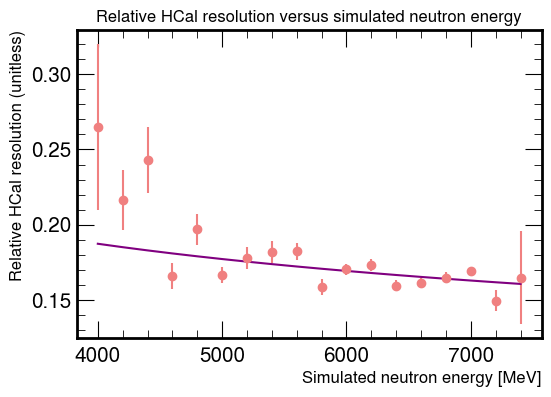

In [37]:
# NEEDS PREVIOUS CELL RUN

def powerFunc(x, coeff, power):
    return coeff*np.pow(x,power)

R=hsigma/hmeans
deltaR=R*np.sqrt( (hsigmaErrs/hsigma)**2 + (H2NErrs/hmeans)**2 - 2*hSMCovar/(hsigma*hmeans) )

goodPoints=(3900<=simNE) & (simNE<=7500)

Rparams, Rcovar=curve_fit(powerFunc, np.array(simNE[goodPoints]), np.array(R[goodPoints]), 
                          sigma=np.array(deltaR[goodPoints]))

print("R="+str(Rparams[0])+"*E_n^"+str(Rparams[1]))
print("Amplitude = "+str(Rparams[0])+" +/- "+str(np.sqrt(Rcovar[0][0])))
print("Exponent = "+str(Rparams[1])+" +/- "+str(np.sqrt(Rcovar[1][1])))
lowestEstimate=powerFunc(simNE[goodPoints], Rparams[0]-np.sqrt(Rcovar[0][0]), Rparams[1]-np.sqrt(Rcovar[1][1]))
highestEstimate=powerFunc(simNE[goodPoints], Rparams[0]+np.sqrt(Rcovar[0][0]), Rparams[1]+np.sqrt(Rcovar[1][1]))

rfig, rax=plt.subplots(figsize=(6,4))
rax.errorbar(simNE, R, yerr=deltaR, marker='o', linestyle=' ', color='lightcoral')
rax.plot(simNE[goodPoints], powerFunc(simNE[goodPoints], Rparams[0], Rparams[1]), color='purple')
#rax.fill_between(simNE[goodPoints], lowestEstimate, highestEstimate, color='purple', alpha=0.1)
rax.set_title("Relative HCal resolution versus simulated neutron energy", fontsize=axisTitleSize)
rax.set_xlabel("Simulated neutron energy [MeV]", fontsize=axisTitleSize)
rax.set_ylabel("Relative HCal resolution (unitless)", fontsize=axisTitleSize)


HCal energy = 2.6455171056890006 + 0.09646825582786465 * expected neutron energy


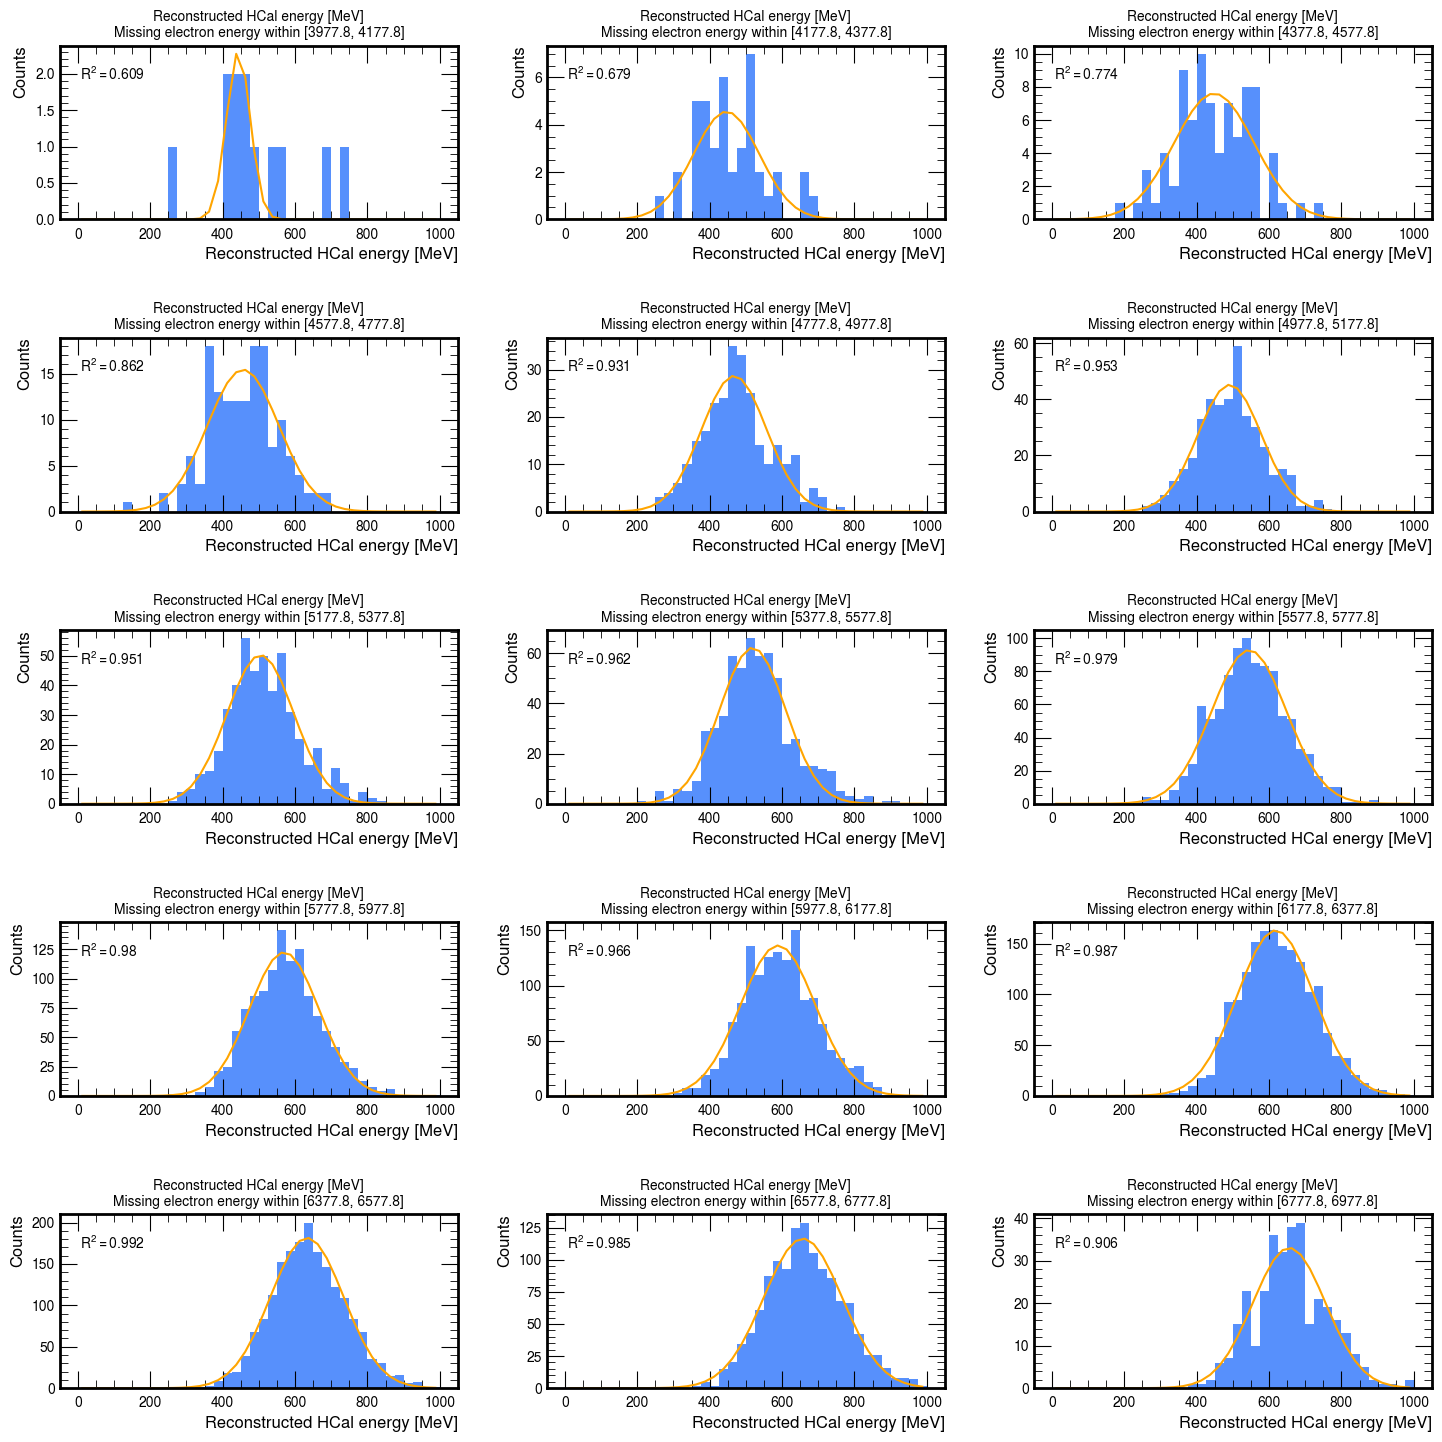

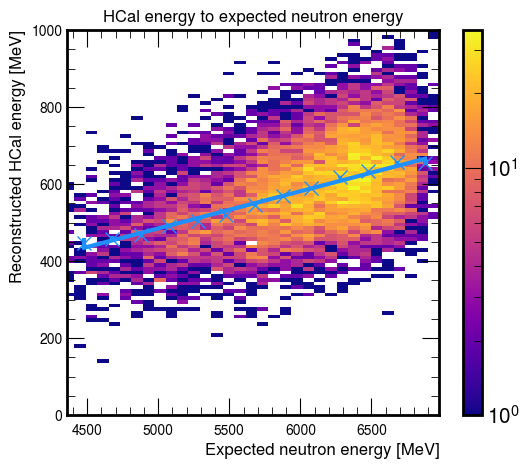

In [38]:
def gaussian(x, mu, sig, amp):
    return amp*np.exp(-(x-mu)**2/(2*sig**2))

rows=5
cols=3
caltots=rows*cols
fig, ax=plt.subplots(rows,cols)
fig.set_figheight(rows*3)
fig.set_figwidth(cols*5)
plt.rcParams['figure.dpi']=100
a=ax.ravel()
calmeans=ak.ArrayBuilder()
expE=ak.ArrayBuilder()
botE=5000*ak.mean(EkinRatioF)
topE=8000*ak.mean(EkinRatioF)
H2EErrs=ak.ArrayBuilder()
for idx, axis in enumerate(a):
    rangeE=3000
    lowerE=topE-rangeE+rangeE/caltots*idx
    middleE=topE-rangeE+rangeE/caltots*(idx+0.5)
    higherE=topE-rangeE+rangeE/caltots*(idx+1)
    HRec=eventsF[(lowerE<((eventsF.electronE-eventsF.EcalRecTotE)*ak.mean(EkinRatioF))) & 
    (((eventsF.electronE-eventsF.EcalRecTotE)*ak.mean(EkinRatioF))<higherE)].HcalRecTotE
    (counts, binEdges, patches)=axis.hist(HRec, bins=40, range=[0,1000])
    axis.tick_params(axis="both", which="major", labelsize=tickSize)
    axis.set_title("Reconstructed HCal energy [MeV]\n"+"Missing electron energy within ["+str(round(lowerE, 1))+
                   ", "+str(round(higherE, 1))+"]", fontsize=10)
    axis.set_xlabel("Reconstructed HCal energy [MeV]", fontsize=axisTitleSize)
    axis.set_ylabel("Counts", fontsize=axisTitleSize)
    with warnings.catch_warnings():
        warnings.simplefilter("error", OptimizeWarning)
        try:
            bins=(binEdges+ (binEdges[1]-binEdges[0])*0.5*np.ones(len(binEdges)) )[:-1]
            params, covar=curve_fit(gaussian, bins, counts, p0=[np.mean(HRec), np.std(HRec), np.max(counts)])
            calmeans.append(params[0])
            expE.append(middleE)
            axis.plot(bins, gaussian(bins, params[0], params[1], params[2]), color='orange')

            residuals=counts-gaussian(bins, *params)
            ss_res=np.sum(residuals**2)
            ss_tot=np.sum((counts-np.mean(counts))**2)
            r2=1-ss_res/ss_tot
            axis.text(0.05, 0.80, "$R^2=$"+str(round(r2,3)), fontsize=10, transform=axis.transAxes)

            H2EErrs.append(np.sqrt(covar[0][0]))
        except:
            continue
plt.tight_layout()
calmeans=ak.Array(calmeans)
expE=ak.Array(expE)
H2EErrs=ak.Array(H2EErrs)

HRecOffset, HRecCoeff=polyfit(expE[missingE>botE], calmeans[missingE>botE], 1)

fig2, ax2=plt.subplots(figsize=(6,5))
misse=ax2.hist2d(np.asarray((eventsF.electronE-eventsF.EcalRecTotE)*ak.mean(EkinRatioF)), 
                 np.asarray(eventsF.HcalRecTotE), bins=100, norm=mpl.colors.LogNorm(vmin=1), cmap='plasma')
fig2.colorbar(misse[3])
ax2.set_xlim(botE, topE)
ax2.set_ylim(0, 1000)
ax2.errorbar(expE[expE>botE], calmeans[missingE>botE], yerr=H2EErrs[expE>botE], 
             marker='x', markersize=10, linestyle='', color='dodgerblue', linewidth=3)
ax2.plot(expE[expE>botE], HRecOffset+HRecCoeff*expE[expE>botE], color='dodgerblue', linewidth=3)
ax2.set_title("HCal energy to expected neutron energy", fontsize=axisTitleSize)
ax2.set_xlabel("Expected neutron energy [MeV]", fontsize=axisTitleSize)
ax2.set_ylabel("Reconstructed HCal energy [MeV]", fontsize=axisTitleSize)
ax2.tick_params(axis="both", which="major", labelsize=tickSize)

print("HCal energy = "+str(HRecOffset) + " + " +str(HRecCoeff) + " * expected neutron energy")